In [1]:
# Data Cleaning, EDA, importing needed libraries and importing the dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('https://raw.githubusercontent.com/LeeMorinUCF/QMB6358S22/main/demo_24_Classification/credit.csv')


df.info()
df.isna().sum()
print(df.dtypes)

df.nunique()


df['Default'] = [1 if X == 1 else 0 for X in df['Default']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default          1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration         1000 non-null   int64 
 3   history          1000 non-null   object
 4   purpose          1000 non-null   object
 5   amount           1000 non-null   int64 
 6   savings          1000 non-null   object
 7   employ           1000 non-null   object
 8   installment      1000 non-null   int64 
 9   status           1000 non-null   object
 10  others           1000 non-null   object
 11  residence        1000 non-null   int64 
 12  property         1000 non-null   object
 13  age              1000 non-null   int64 
 14  otherplans       1000 non-null   object
 15  housing          1000 non-null   object
 16  cards            1000 non-null   int64 
 17  job              1000 non-null   o

<Axes: >

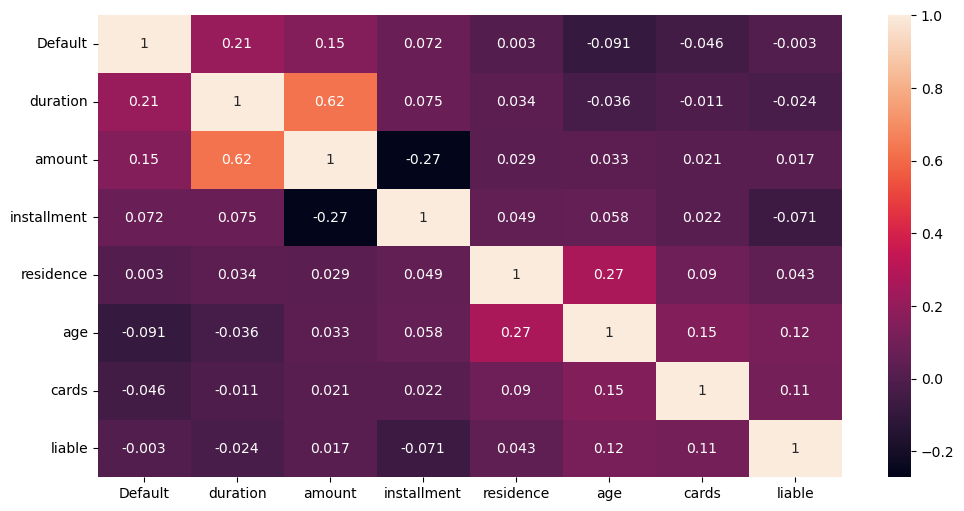

In [2]:
# Making a copy the original dataframe(df) named 'df1', and then using LabelEncoder to make a heatmap of correlations 
import seaborn as sns
import matplotlib.pyplot as plt


df1 = df.copy()

plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), annot=True)

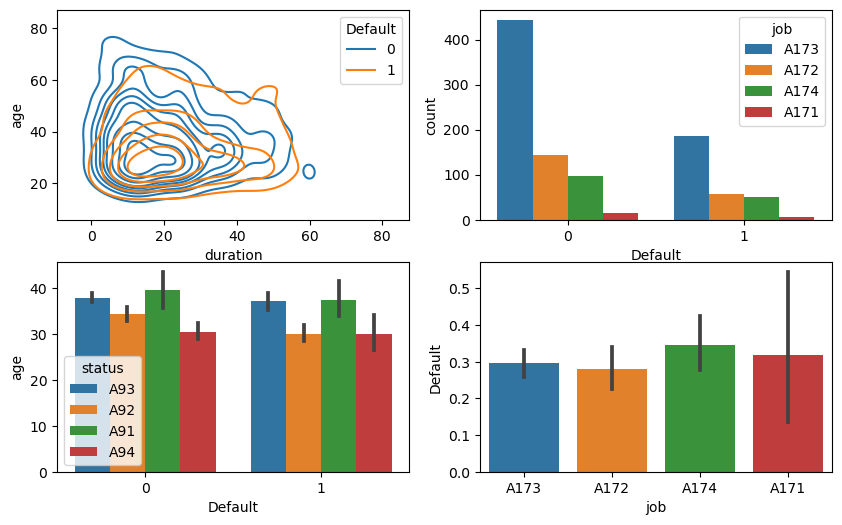

In [3]:
# Using df1, I will now make a user-defined function 'subplots' to show visuals of the data
def sub(df1):
    plt_,axs = plt.subplots(2,2,figsize=(10,6))
    sns.kdeplot(x='duration',y='age',ax=axs[0,0],data=df1,hue='Default')
    sns.countplot(x='Default',ax=axs[0,1],data=df1,hue='job')
    sns.barplot(x='Default',y='age',ax=axs[1,0],hue='status',data=df1)
    sns.barplot(x='job',y='Default',ax=axs[1,1],data=df1)
    plt.show()
    


sub(df1)

In [4]:
# Now, I will use 'Default' as the dependent variable and run a train/test and then use onehotencoder to turn the object
# features into numerical features as well as running standard scaler to the numerical features through make_column_transformed

X = df.drop('Default',axis=1)
y = df['Default']



from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)


# to object classes into numerical classes
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# standard scaler is used to scaling the numerical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


# 'make_column_transformer' is used make it so this process works in a single step

from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (ohe,X.select_dtypes(include='object').columns),(sc,X.select_dtypes(include=['int64']).columns),remainder='passthrough')


# X_train and X_test had to be transformed so the steps that were used through the transformation can be
# ran through a pipeline
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


In [5]:
#Before running a pipeline, I will just import the models I will be using.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier

rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
BC = BaggingClassifier()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)


In [6]:
# now that all of the models are imported, I will import 'make_pipeline' from sklearn and then use it in the user-defined
# function below name 'evaluate_model'. I do this because it is much cleaner and simpler to run the pipeline through
# a user-defined function that will also score that data using roc_auc scoring for predicted probabilities, accuracy
# to, test the accuracy,f1 scoring, and a confusion matrix is also in the user-defined function to show the True positive rate,
# True Negative Rate, False Positive rate and False Negative Rate

from sklearn.pipeline import make_pipeline





from sklearn.metrics import roc_auc_score,roc_curve,f1_score,confusion_matrix,accuracy_score


def evaluate_model(model,X_train_transformed,X_test_transformed,y_train,y_test):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[::,1]
    acc = accuracy_score(y_test, pred)
    roc = roc_auc_score(y_test, pred_prob)
    f1 = f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    print('Confusion Matrix',cm)
    print(f'{model.__class__.__name__} --Accuracy-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%; --F1-- {f1*100:.2f}%')
    return pred,pred_prob

lr_pred,lr_pred_prob = evaluate_model(lr, X_train_transformed, X_test_transformed, y_train, y_test)
rfc_pred,rfc_pred_prob = evaluate_model(rfc,X_test_transformed,X_test_transformed,y_train,y_test)
gbc_pred,gbc_pred_prob =  evaluate_model(gbc, X_train_transformed, X_test_transformed, y_train, y_test)
nb_pred,nb_pred_prob = evaluate_model(nb, X_train_transformed, X_test_transformed, y_train, y_test)
knn_pred,knn_pred_prob = evaluate_model(knn, X_train_transformed, X_test_transformed, y_train, y_test)
tree_pred,tree_pred_prob = evaluate_model(tree, X_train_transformed, X_test_transformed, y_train, y_test)
BC_pred,BC_pred_prob = evaluate_model(BC, X_train_transformed, X_test_transformed, y_train, y_test)

Confusion Matrix [[118  24]
 [ 26  32]]
LogisticRegression --Accuracy-- 75.00%; --ROC-- 72.34%; --F1-- 56.14%
Confusion Matrix [[125  17]
 [ 31  27]]
RandomForestClassifier --Accuracy-- 76.00%; --ROC-- 78.10%; --F1-- 52.94%
Confusion Matrix [[122  20]
 [ 25  33]]
GradientBoostingClassifier --Accuracy-- 77.50%; --ROC-- 74.30%; --F1-- 59.46%
Confusion Matrix [[98 44]
 [19 39]]
GaussianNB --Accuracy-- 68.50%; --ROC-- 69.97%; --F1-- 55.32%
Confusion Matrix [[130  12]
 [ 45  13]]
KNeighborsClassifier --Accuracy-- 71.50%; --ROC-- 73.70%; --F1-- 31.33%
Confusion Matrix [[109  33]
 [ 33  25]]
DecisionTreeClassifier --Accuracy-- 67.00%; --ROC-- 59.93%; --F1-- 43.10%
Confusion Matrix [[125  17]
 [ 31  27]]
BaggingClassifier --Accuracy-- 76.00%; --ROC-- 75.67%; --F1-- 52.94%


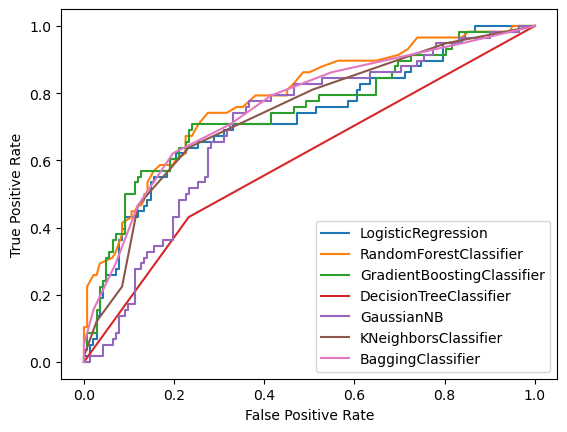

In [7]:
# A grapg of all of the models used in the testing portion to visually display each moldels roc score


def ROC_Curve(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')



ROC_Curve(y_test,lr_pred_prob,lr)
ROC_Curve(y_test,rfc_pred_prob,rfc)
ROC_Curve(y_test,gbc_pred_prob,gbc)
ROC_Curve(y_test,tree_pred_prob,tree)
ROC_Curve(y_test,nb_pred_prob,nb)
ROC_Curve(y_test, knn_pred_prob,knn)
ROC_Curve(y_test,BC_pred_prob,BC)
plt.legend()
plt.show()

In [8]:
#Finally, using 5-fold cross-validation for each model

from sklearn.model_selection import cross_val_score


def cross_validation(model,X_train_transformed,y_train):
    model = model.fit(X_train_transformed,y_train)
    cv_score = cross_val_score(model, X_train_transformed,y_train,cv=5,scoring='roc_auc').mean()
    print(f'{model.__class__.__name__}, --5-fold Cross-Validation Score-- {cv_score*100:.2f}%')
    return cv_score
    

lr_score = cross_validation(lr, X_train_transformed, y_train)
gbc_score = cross_validation(gbc, X_train_transformed, y_train)
rfc_score = cross_validation(rfc, X_train_transformed, y_train)
tree_score = cross_validation(tree, X_train_transformed, y_train)
nb_score = cross_validation(nb, X_train_transformed, y_train)
knn_score = cross_validation(knn, X_train_transformed, y_train)
BC_score = cross_validation(BC, X_train_transformed, y_train)

LogisticRegression, --5-fold Cross-Validation Score-- 80.31%
GradientBoostingClassifier, --5-fold Cross-Validation Score-- 78.50%
RandomForestClassifier, --5-fold Cross-Validation Score-- 79.76%
DecisionTreeClassifier, --5-fold Cross-Validation Score-- 61.82%
GaussianNB, --5-fold Cross-Validation Score-- 74.91%
KNeighborsClassifier, --5-fold Cross-Validation Score-- 73.99%
BaggingClassifier, --5-fold Cross-Validation Score-- 74.00%
